<a href="https://www.kaggle.com/code/niteshk97/car-price-prediction-linear-regression?scriptVersionId=115926981" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Linear Regression**-
Linear Regression is a method to predict dependent varaible (Y) based on values of independent varaibles (X) by modelling the relationship between them as a straight line.

**Business Goal**
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-data/CarPrice_Assignment.csv
/kaggle/input/car-data/Data Dictionary - carprices.xlsx


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('../input/car-data/CarPrice_Assignment.csv') 
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
##CarName column -> companyname
df['CarName']=df['CarName'].apply(lambda x:x.split(' ', 1)[0])
df.rename(columns = {'CarName':'companyname'}, inplace = True)
df.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
#unique values (companyname)
df.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
df.companyname.nunique()

28

In [9]:
#Correction (spelling error)
df.companyname = df.companyname.str.lower()

def new_name(a,b):
    df.companyname.replace(a,b,inplace=True)

new_name('maxda','mazda')
new_name('porcshce','porsche')
new_name('toyouta','toyota')
new_name('vokswagen','volkswagen')
new_name('vw','volkswagen')

df.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
df.companyname.nunique()

22

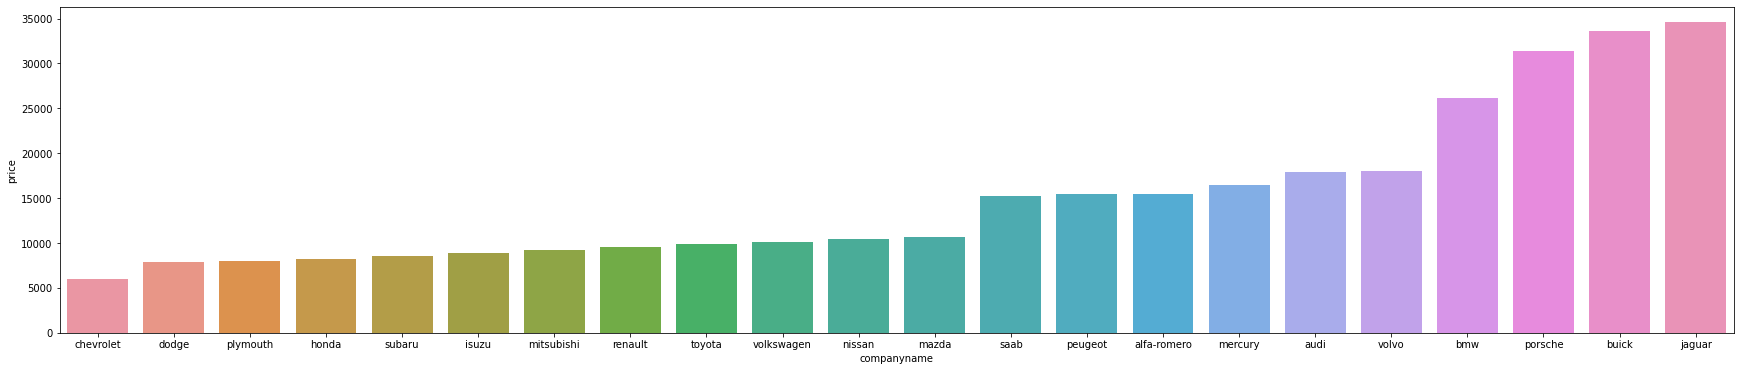

In [11]:
#Company wise avg.price of the car
df1 = pd.DataFrame(df.groupby(['companyname'])['price'].mean().sort_values())
df1=df1.reset_index(drop=False)
plt.figure(figsize=(30, 6))
plt1=sns.barplot(x=df1["companyname"], y=df1["price"])

In [12]:
#divide the Car Companies based on avg prices of
def new_group(a,b):
    df.companyname.replace(a,b,inplace=True)

new_group('chevrolet','Low')
new_group('dodge','Low')
new_group('plymouth','Low')
new_group('honda','Low')
new_group('subaru','Low')
new_group('isuzu','Low')
new_group('mitsubishi','Low')
new_group('renault','Medium')
new_group('toyota','Medium')
new_group('volkswagen','Medium')
new_group('nissan','Medium')
new_group('mazda','Medium')
new_group('saab','Medium')
new_group('peugeot','Medium')
new_group('alfa-romero','High')
new_group('mercury','High')
new_group('audi','High')
new_group('volvo','High')
new_group('bmw','High')
new_group('porsche','High')
new_group('buick','High')
new_group('jaguar','High')

df.rename(columns = {'companyname':'Type'}, inplace = True)
df.head()

,car_ID,symboling,Type,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,High,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,High,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,High,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,High,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,High,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
#now visualize other categorical data with price
def check_rltn(var1, var2):
    plt.figure(figsize=(15, 10))   
    plt.subplot(2,2,1)
    plt.title('Histogram of '+ var1)
    sns.countplot(df[var1], palette=("husl"))
    plt1.set(xlabel = '%var1', ylabel='Frequency of'+ '%s'%var1)
    
    plt.subplot(2,2,2)
    plt.title(var1+' vs Price')
    sns.boxplot(x=df[var1], y=df.price, palette=("husl"))
    
    plt.subplot(2,2,3)
    plt.title('Histogram of '+ var2)
    sns.countplot(df[var2], palette=("husl"))
    plt1.set(xlabel = '%var2', ylabel='Frequency of'+ '%s'%var2)
    
    plt.subplot(2,2,4)
    plt.title(var1+' vs Price')
    sns.boxplot(x=df[var2], y=df.price, palette=("husl"))
    
    plt.show()   

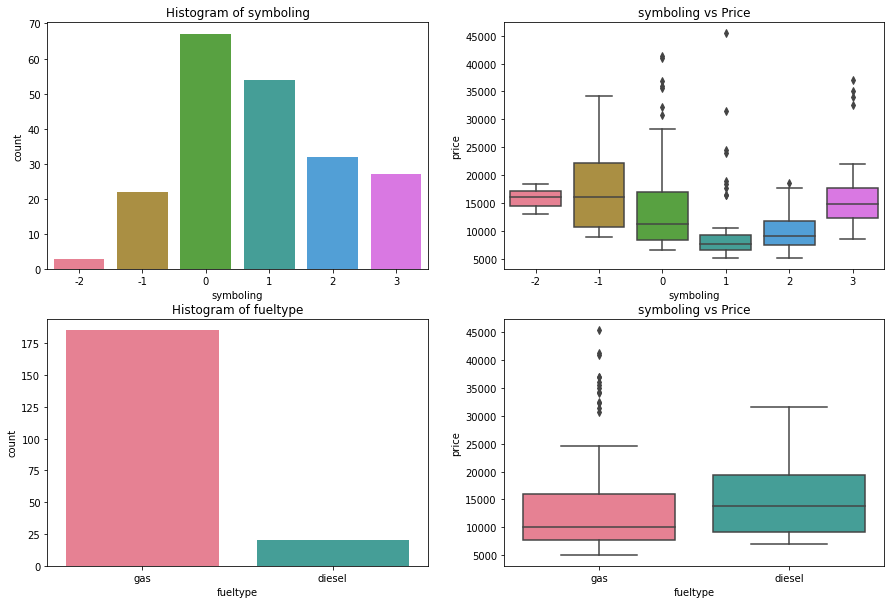

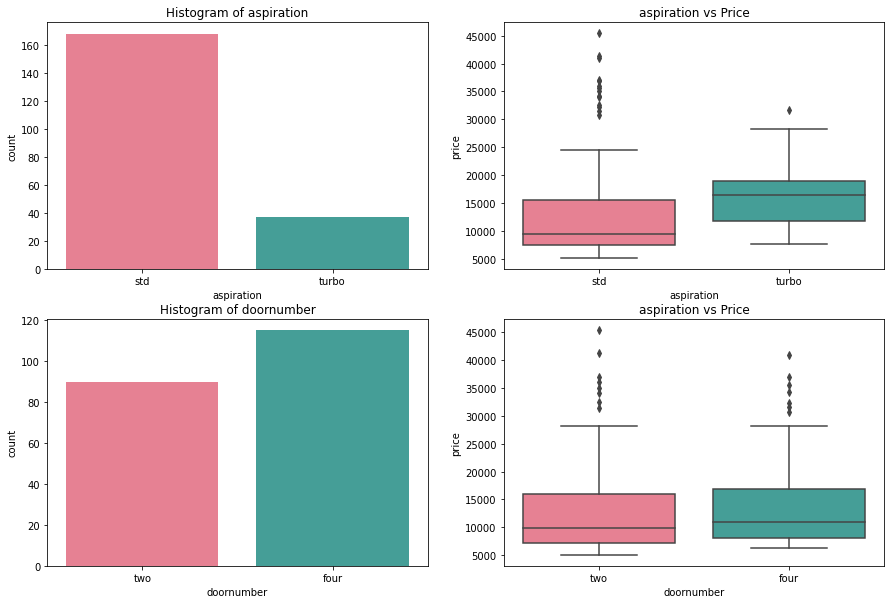

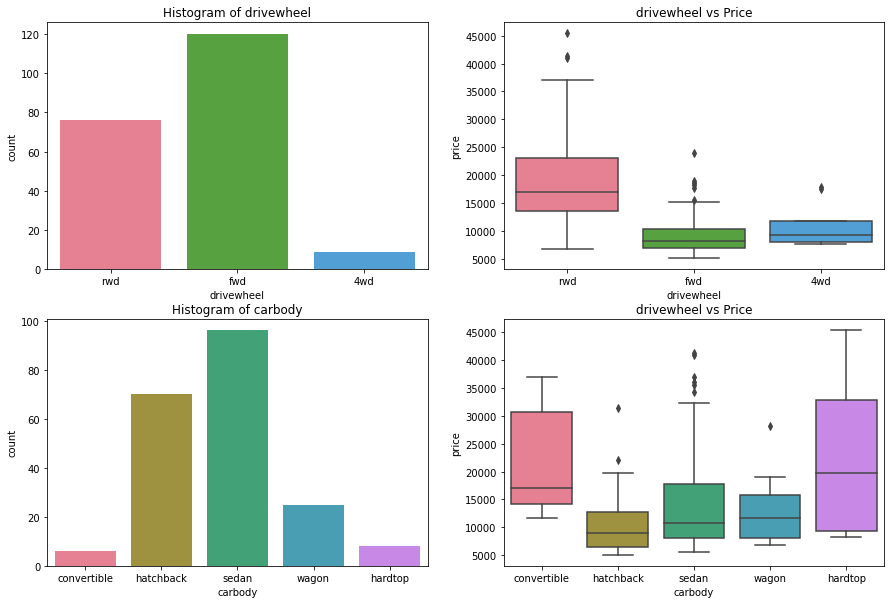

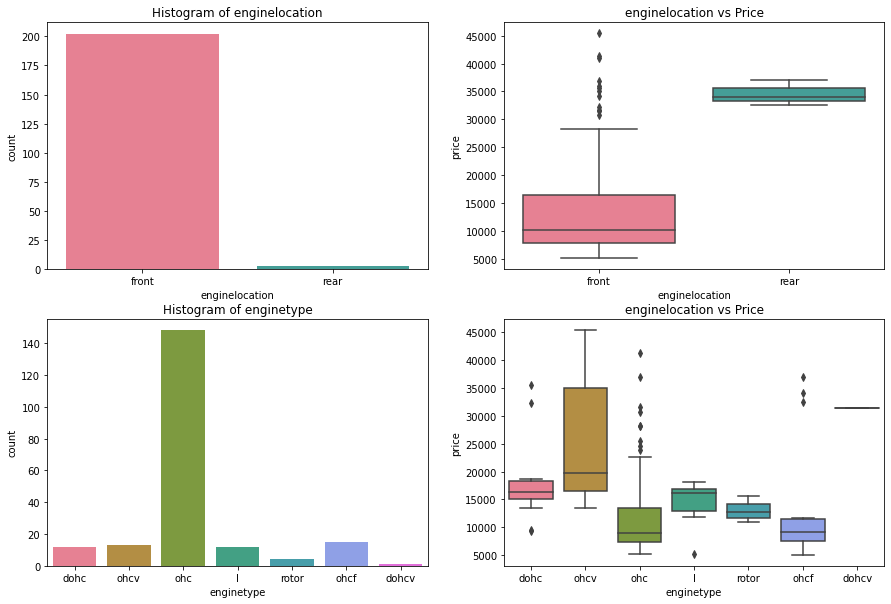

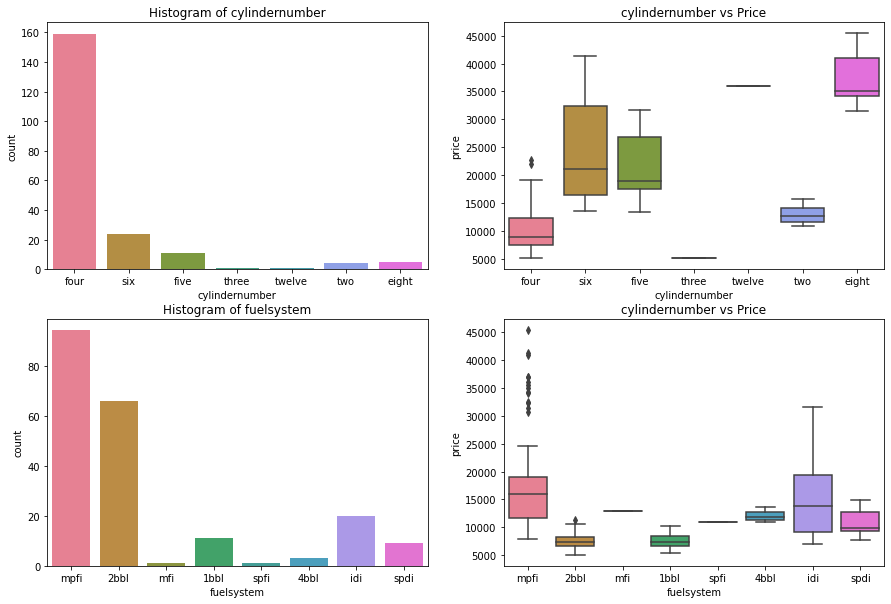

In [14]:
check_rltn('symboling', 'fueltype')
check_rltn('aspiration', 'doornumber')
check_rltn('drivewheel', 'carbody')
check_rltn('enginelocation', 'enginetype')
check_rltn('cylindernumber', 'fuelsystem')

In [15]:
#now converting cylinder number to numeric
def cyln_convert(a,b):
    df.cylindernumber.replace(a,b,inplace=True)

cyln_convert('four','4')
cyln_convert('six','6')
cyln_convert('five','5')
cyln_convert('three','3')
cyln_convert('twelve','12')
cyln_convert('two','2')
cyln_convert('eight','8')

df.cylindernumber=df.cylindernumber.astype('int')

In [16]:
#Converting variables with 2 values to 1 and 0

df['fueltype'] = df['fueltype'].map({'gas': 1, 'diesel': 0})
df['aspiration'] = df['aspiration'].map({'std': 1, 'turbo': 0})
df['doornumber'] = df['doornumber'].map({'two': 1, 'four': 0})
df['enginelocation'] = df['enginelocation'].map({'front': 1, 'rear': 0})

In [17]:
df.drop(['car_ID'], axis =1, inplace = True)

In [18]:
#dropping variables which are highly correlated to other variables

df.drop(['compressionratio','carwidth','curbweight','wheelbase','citympg'], axis =1, inplace = True)

In [19]:
#getting dummies for categorical variables
df2 = pd.get_dummies(df)
df2.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,1,1,168.8,48.8,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,168.8,48.8,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,171.2,52.4,6,152,2.68,...,1,0,0,0,0,0,0,1,0,0
3,2,1,1,0,1,176.6,54.3,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,176.6,54.3,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [20]:
df2.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carlength', 'carheight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'highwaympg', 'price', 'Type_High',
       'Type_Low', 'Type_Medium', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

In [21]:
#Dividing
from sklearn.model_selection import train_test_split
df2_train, df2_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
# Apply scaler() to all the columns except the 'yes-no' & 'dummy' variables
num_vars = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'enginesize','horsepower', 
            'peakrpm', 'highwaympg', 'carlength', 'carheight', 'boreratio', 'stroke', 'price']
df2_train[num_vars] = scaler.fit_transform(df2_train[num_vars])
df2_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,1,1.0,1.0,0.0,1.0,0.426016,0.265487,4,0.139623,0.230159,...,0,0,0,1,0,0,0,0,0,0
125,3,1.0,1.0,1.0,1.0,0.452033,0.212389,4,0.339623,1.000000,...,0,0,0,0,0,0,0,1,0,0
166,1,1.0,1.0,1.0,1.0,0.448780,0.424779,4,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
1,3,1.0,1.0,1.0,1.0,0.450407,0.088496,4,0.260377,0.626984,...,0,0,0,0,0,0,0,1,0,0
199,-1,1.0,0.0,0.0,1.0,0.775610,0.858407,4,0.260377,0.746032,...,0,0,0,0,0,0,0,1,0,0


In [24]:
y_train = df2_train.pop('price')
X_train = df2_train

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [27]:
print(lr.coef_)
print(lr.intercept_)

[ 1.28593906e-02 -9.31742425e-03 -7.67310334e-02 -1.86748128e-02
 -9.83267542e-02  1.85342267e-01  1.04884104e-01 -7.47126033e-02
  1.75103829e+00 -3.68698756e-01 -2.73773629e-01  1.99383355e-01
  1.27556451e-01  1.47173265e-01  6.71707183e-02 -3.82222886e-02
 -2.89484297e-02  7.94322519e-02 -3.44436397e-02 -1.67635170e-03
 -1.31498565e-02 -3.01624040e-02 -1.55608917e-02 -1.64238432e-02
  3.19847349e-02 -1.35601142e-01  1.55018567e-01 -5.84999871e-02
 -8.29572780e-03  4.05114606e-02 -1.51828305e-01  1.58695135e-01
  4.28671988e-03  1.39714779e-02  1.10115307e-02  9.31742425e-03
  0.00000000e+00  1.33817350e-02 -5.19688877e-02  0.00000000e+00]
0.349948226674382
